In [1]:
#Imports for the project: 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

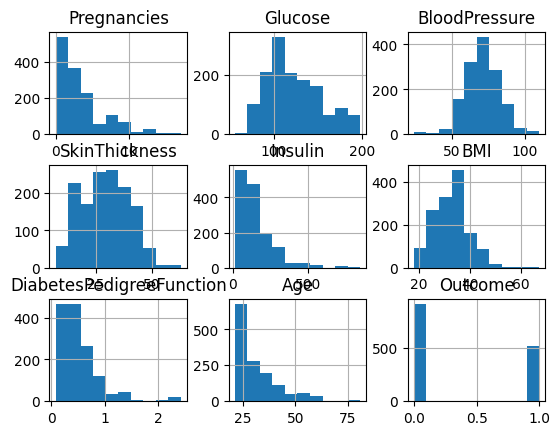

In [2]:
#Loading data and creating a test train split:

data=pd.read_csv("Diabetes.csv")
train_data, test_data = train_test_split(data, test_size=0.25, random_state=33)
data.hist()


In [3]:
print(train_data.head())
print(test_data.head())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
901             4      116             72             12       87  22.1   
1209            0       95             85             25       36  37.4   
611            15      136             70             32      110  37.1   
545             1      103             30             38       83  43.3   
1252            9      134             74             33       60  25.9   

      DiabetesPedigreeFunction  Age  Outcome  
901                      0.463   37        0  
1209                     0.247   24        1  
611                      0.153   43        1  
545                      0.183   33        0  
1252                     0.460   81        0  
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
787             3       74             68             28       45  29.7   
290             9      134             74             33       60  25.9   
1021            1      181             64 

In [4]:
train_data_X = train_data.iloc[:,0:8].values
train_data_Y = train_data.iloc[:,8:9].values
test_data_X = test_data.iloc[:,0:8].values
test_data_Y= test_data.iloc[:,8:9].values

# Add a standard scalar
scaler = StandardScaler()
train_data_X = scaler.fit_transform(train_data_X)
test_data_X = scaler.fit_transform(test_data_X)

model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(train_data_X.shape[1],)))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(1,activation="sigmoid"))

model.summary()

c:\Users\14158\miniconda3\envs\internship\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,497 (25.38 KB)

 Trainable params: 6,497 (25.38 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [6]:
history = model.fit(train_data_X,train_data_Y, batch_size=64, epochs=55, validation_split=0.1)

Epoch 1/55
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6895 - loss: 0.5799 - val_accuracy: 0.7664 - val_loss: 0.4824
Epoch 2/55
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7622 - loss: 0.4616 - val_accuracy: 0.7383 - val_loss: 0.4299
Epoch 3/55
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7414 - loss: 0.4848 - val_accuracy: 0.7664 - val_loss: 0.4150
Epoch 4/55
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7812 - loss: 0.4543 - val_accuracy: 0.7477 - val_loss: 0.4175
Epoch 5/55
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7670 - loss: 0.4761 - val_accuracy: 0.7850 - val_loss: 0.4856
Epoch 6/55
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7787 - loss: 0.4520 - val_accuracy: 0.7850 - val_loss: 0.4203
Epoch 7/55
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8003 - loss: 0.4197 - val_accuracy: 0.8131 - val_loss: 0.3822
Epoch 8/55
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7895 - loss: 0.4281 - val_accuracy: 0.7850 - val_loss

In [8]:
# Saving the Model: 
model.save('./saved_models/saved_model.keras')

# Epochs vs Loss
***

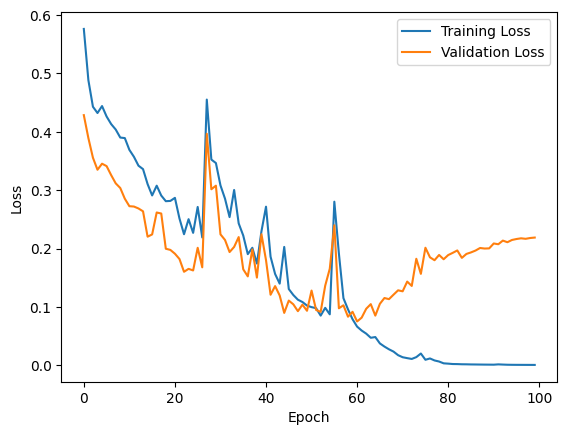

In [ ]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Epoch vs Accuracy:
***

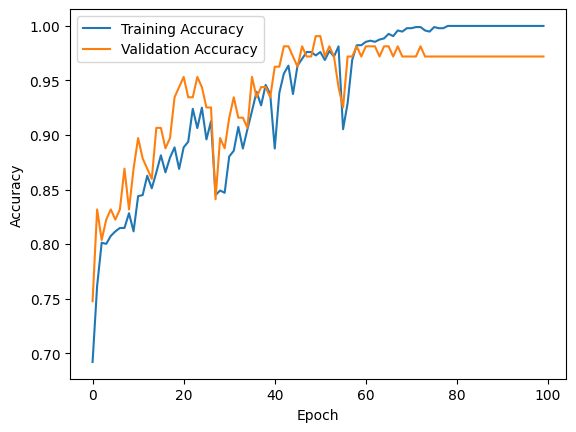

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Testing Brute force inputs: 
***

In [33]:
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('./saved_models/saved_model.keras')

# Assuming these are the features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
features = [100, 180, 70, 45, 2000, 30.5, 0.158, 20]

# Convert the list of features into a 2D NumPy array with shape (1, number_of_features)
features_array = np.array([features])  # Notice the extra brackets to create a 2D array with one row    

# Make a prediction
prediction = model.predict(features_array)
prediction_val = prediction[0][0]

if prediction_val == 1.0:
    print("Im sorry my friend, you have diabetes")
else:
    print("Yipee!, no diabetes detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
0.0
Yipee!, no diabetes detected
